In [214]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
file1 = pd.read_csv(mouse_drug_data_to_load)
file2 = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
file_new = pd.merge(file1, file2, on="Mouse ID")

# Display the data table for preview
file_new.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [215]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
groupby_file = file_new.groupby(["Drug", "Timepoint"])
groupby_file_mean = groupby_file["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
summary_data = pd.DataFrame(groupby_file_mean)
summary_data_mean = summary_data.reset_index()
# Preview DataFrame
summary_data_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [216]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = groupby_file["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
summary_data_std_error = pd.DataFrame(standard_error)
summary_data_std_error_new = summary_data_std_error.reset_index()
# Preview DataFrame
summary_data_std_error_new

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [217]:
summary_data_mean["std_error"] = summary_data_std_error_new["Tumor Volume (mm3)"]
summary_data_mean

,Drug,Timepoint,Tumor Volume (mm3),std_error
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.448593
2,Capomulin,10,43.084291,0.702684
3,Capomulin,15,42.064317,0.838617
4,Capomulin,20,40.716325,0.909731
...,...,...,...,...
95,Zoniferol,25,55.432935,0.602513
96,Zoniferol,30,57.713531,0.800043
97,Zoniferol,35,60.089372,0.881426
98,Zoniferol,40,62.916692,0.998515


In [174]:
# Minor Data Munging to Re-Format the Data Frames
summary_data_mean.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
# Preview that Reformatting worked

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [202]:
# Generate the Plot (with Error Bars)
# fig,ax = plt.subplots()
# for drug in summary_data_mean["Drug"]:
    m = summary_data_mean.loc[summary_data_mean["Drug"] == str(drug)]
    ai = m["Timepoint"]
    bi = m["Tumor Volume (mm3)"]
    
    plt.title("This is a plot image")       
    ax.set_ylim(35, 80, 5)                    
    ax.set_yticks(range(30, 80, 5))
    ax.set_ylabel("Tumor Volume (mm3)")
    ax.set_xlabel("Time (Days)")

    plt.plot(ai, bi, "^:",label=(f"{drug}"), color='b')
    plt.legend(loc='best')                  
    plt.grid(True)                          
    plt.show()
    
# Save the Figure



IndentationError: unexpected indent (<ipython-input-202-2c9dfb0d8fce>, line 4)

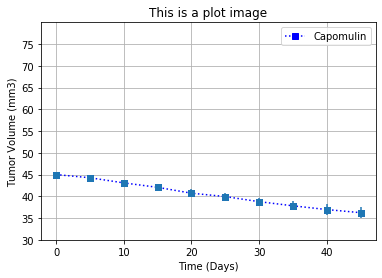

In [221]:
m = summary_data_mean.loc[summary_data_mean["Drug"] == "Capomulin"]
a1 = m["Timepoint"]
b1 = m["Tumor Volume (mm3)"]
c1 = m["std_error"]

fig,ax = plt.subplots()
plt.title("This is a plot image") 
ax.errorbar(a1, b1, c1, fmt="s")
ax.set_ylim(35, 80, 5)                    
ax.set_yticks(range(30, 80, 5))
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Time (Days)")

plt.plot(a1, b1, "s:",label="Capomulin", color='b')
plt.legend(loc='best')                  
plt.grid(True)                          
plt.show()

In [194]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [121]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
groupby_file_mean2 = groupby_file["Metastatic Sites"].mean()
# Convert to DataFrame
summary_data2 = pd.DataFrame(groupby_file_mean2)
summary_data_mean2 = summary_data2.reset_index()
# Preview DataFrame
summary_data_mean2

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [124]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error2 = groupby_file["Metastatic Sites"].sem()
# Convert to DataFrame
summary_data_std_error2 = pd.DataFrame(standard_error2)
# Preview DataFrame
summary_data_std_error2.reset_index()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [125]:
# Minor Data Munging to Re-Format the Data Frames
summary_data_mean2.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [252]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
groupby_file.head()
mice_count = groupby_file["Mouse ID"].count()
mice_count

In [264]:
# Convert to DataFrame
mice_count_data = pd.DataFrame(mice_count)
mice_count_data = mice_count_data.reset_index()
mice_count_data = mice_count_data.rename(columns={"Mouse ID":"Mice Count"})
mice_count_data

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [265]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_data.pivot(index="Timepoint", columns="Drug", values="Mice Count")
# Preview the Data Frame

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)